In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
notebook_dir = os.path.abspath("")

file_path = os.path.abspath(
    os.path.join(notebook_dir, "..", "resources", "01_labels", "data_set.json")
)


# Load JSON data (as list of dicts)
with open(file_path) as f:
    data = json.load(f)

df = pd.DataFrame(data)

In [3]:
# Define conditions based on the 'id' prefix
conditions = [
    df["id"].str.startswith("EA"),
    df["id"].str.startswith("MS"),
    df["id"].str.startswith("PS"),
    df["id"].str.startswith("STC"),
]

labels = [
    "Extensibility Assistance",
    "Malaysia Support",
    "Peppol Support",
    "Settlement Cases",
]

# Add case_type column
df["case_type"] = np.select(conditions, labels, default="Unknown")

/var/folders/nr/mg0w99s91kg0rvjr9xkypfwh0000gn/T/ipykernel_37857/3452594880.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_word_counts.values, y=avg_word_counts.index, palette="Blues_d")


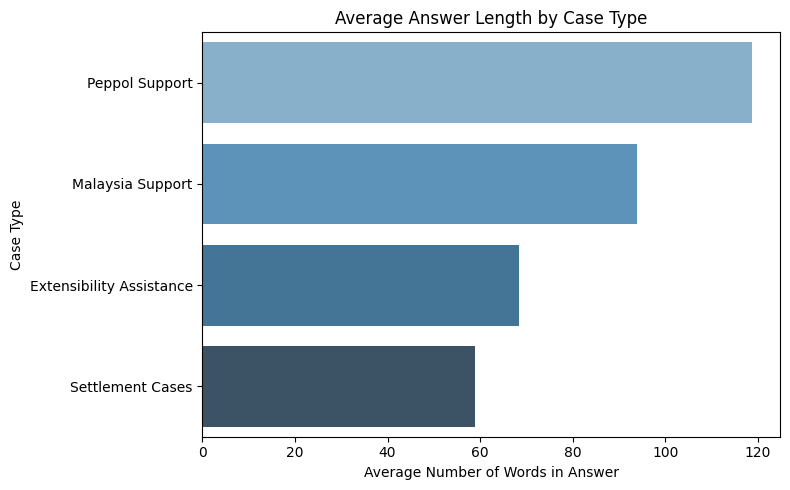

In [4]:
# Compute word counts in the 'answer' column
df["word_count"] = df["answer"].dropna().apply(lambda x: len(str(x).split()))

# Group by case type and compute mean word count
avg_word_counts = (
    df.groupby("case_type")["word_count"].mean().sort_values(ascending=False)
)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_word_counts.values, y=avg_word_counts.index, palette="Blues_d")
plt.xlabel("Average Number of Words in Answer")
plt.ylabel("Case Type")
plt.title("Average Answer Length by Case Type")
plt.tight_layout()
plt.show()

In [5]:
# Compute average word count for 'question' column
average_question_word_count = (
    df["question"].dropna().apply(lambda x: len(str(x).split())).mean()
)

print(f"Average number of words in 'question': {average_question_word_count:.2f}")

Average number of words in 'question': 32.81


In [6]:
# Compute average word count for 'answer' column
average_answer_word_count = (
    df["answer"].dropna().apply(lambda x: len(str(x).split())).mean()
)

print(f"Average number of words in 'answer': {average_answer_word_count:.2f}")

Average number of words in 'answer': 71.92


In [7]:
ratio = average_answer_word_count / average_question_word_count
print(f"Answer-to-question word ratio: {ratio:.2f}")

Answer-to-question word ratio: 2.19
